In [1]:
k = 4

In [2]:
import os
from tqdm import tqdm

import pandas as pd
import numpy as np

def generate_combinations(alphabet, k):
    if k == 0: return ['']
        
    combinations = []
    for char in alphabet:
        for suffix in generate_combinations(alphabet, k - 1):
            combinations.append(char + suffix)
    
    return combinations

In [3]:
set_kmer = generate_combinations(alphabet=['A', 'C', 'G', 'T'], k=k)
set_type = {kmer: np.float16 for kmer in set_kmer}

In [4]:
dfData = pd.read_csv(f'data/DATA_benA_species_{k}mer.csv', dtype=set_type)

In [5]:
dfData.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 259 entries, Unnamed: 0 to TTTT
dtypes: float16(256), int64(1), object(2)
memory usage: 507.6 KB


In [6]:
dfData

,Unnamed: 0,Genus,Species,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
0,0,Aspergillus,Aspergillus creber,0.396973,-0.303955,-1.004883,-0.303955,1.097656,0.396973,1.097656,...,0.396973,-0.303955,-1.004883,-0.303955,-0.303955,-1.004883,-1.004883,2.500000,0.396973,1.798828
1,1,Aspergillus,Aspergillus creber,0.319336,-0.373291,-1.066406,-0.373291,1.704102,-0.373291,1.011719,...,1.011719,-0.373291,-1.066406,-0.373291,-0.373291,-0.373291,-1.066406,2.396484,0.319336,0.319336
2,2,Aspergillus,Aspergillus creber,-0.218750,-0.218750,-0.965820,-0.965820,2.021484,-0.218750,1.274414,...,0.527832,-0.965820,-0.965820,-0.965820,-0.218750,-0.965820,-0.965820,-0.965820,-0.218750,-0.965820
3,3,Aspergillus,Aspergillus creber,-0.321045,-0.321045,-1.035156,-1.035156,1.822266,-0.321045,1.108398,...,1.108398,-1.035156,-1.035156,-0.321045,-0.321045,-1.035156,-1.035156,1.822266,0.393555,1.822266
4,4,Aspergillus,Aspergillus creber,0.306885,-0.358887,-1.024414,-0.358887,1.638672,0.306885,0.972656,...,0.306885,-0.358887,-1.024414,-0.358887,-0.358887,-1.024414,-1.024414,2.304688,0.306885,1.638672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,775,Penicillium,Penicillium vagum,-0.465576,0.308350,-1.239258,1.082031,-0.465576,1.082031,1.082031,...,1.082031,-0.465576,1.082031,0.308350,1.856445,-0.465576,0.308350,0.308350,-0.465576,1.856445
776,776,Penicillium,Penicillium vagum,-1.180664,-0.443359,-1.180664,-0.443359,-1.180664,1.030273,1.030273,...,1.030273,-0.443359,1.030273,0.293701,1.767578,-0.443359,0.293701,0.293701,-0.443359,1.767578
777,777,Penicillium,Penicillium vagum,-1.263672,0.244507,-1.263672,0.244507,0.244507,0.998535,0.998535,...,0.998535,-0.509766,0.998535,0.244507,2.507812,-0.509766,0.244507,0.244507,-0.509766,1.752930
778,778,Penicillium,Penicillium vagum,-0.465576,0.308350,-1.239258,1.082031,-0.465576,1.082031,1.082031,...,1.082031,-0.465576,1.082031,0.308350,1.856445,-0.465576,0.308350,0.308350,-0.465576,1.856445


In [7]:
print('# genus  : ', len(dfData['Genus'].unique()))
print('# species: ', len(dfData['Species'].unique()))
print('# samples: ', dfData.shape[0])

# genus  :  2
# species:  39
# samples:  780


In [8]:
with open('data/species_common.txt', 'r') as f:
    common_species = [species.strip().replace('_', ' ') for species in f.readlines()]

In [9]:
dfData = dfData[dfData['Species'].isin(common_species)]

In [10]:
print('# genus  : ', len(dfData['Genus'].unique()))
print('# species: ', len(dfData['Species'].unique()))
print('# samples: ', dfData.shape[0])

# genus  :  2
# species:  35
# samples:  700


In [11]:
import torch

print("PyTorch 버전:", torch.__version__)
print("CUDA 사용 가능 여부:", torch.cuda.is_available())

PyTorch 버전: 2.1.0
CUDA 사용 가능 여부: True


In [12]:
X = dfData.iloc[:, 3:].values
input_size = X.shape[1]

In [13]:
X.shape

(700, 256)

In [227]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y = dfData['Species']
y_encoded = label_encoder.fit_transform(y)
num_classes = max(y_encoded) + 1

/disk1/01.Myeongkyu/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/disk1/01.Myeongkyu/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [18]:
import torch.nn as nn
import torch.optim as optim

In [19]:
def conv1x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    return nn.Conv1d(in_planes, out_planes, kernel_size=3, stride=stride, padding=dilation,
                     groups=groups, bias=False, dilation=dilation)


class MyBlock1D(nn.Module):
    def __init__(self, in_planes, planes, stride=1, downsample=None,
                groups=1, dilation=1, norm_layer=None):
        super(MyBlock1D, self).__init__()

        if norm_layer is None:
            norm_layer = nn.BatchNorm1d
        
        self.conv1 = conv1x3(in_planes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.conv2 = conv1x3(planes, planes)
        self.bn2 = norm_layer(planes)
        
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        
    def forward(self, x):
        if self.downsample is not None:
            residual = self.downsample(x)
        else: residual = x
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        
        x = self.conv2(x)
        x = self.bn2(x)

        x += residual
        x = self.relu(x)
        
        return x

class MyResNet(nn.Module):
    def __init__(self, c1, c2, c3, c4, c5, kernel1,
                 block, layers, num_classes, zero_init_residual=False, norm_layer=None):
        super(MyResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm1d
        self._norm_layer = norm_layer

        self.inplanes = c1
        self.dilation = 1
        self.groups = 1
        
        self.conv1 = nn.Conv1d(1, self.inplanes, kernel_size=kernel1, stride=2, padding=3)
        self.bn1 = norm_layer(c1)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool1d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, c2, layers[0])
        self.layer2 = self._make_layer(block, c3, layers[1], stride=2, dilate=False)
        self.layer3 = self._make_layer(block, c4, layers[2], stride=2, dilate=False)
        self.layer4 = self._make_layer(block, c5, layers[3], stride=2, dilate=False)
        
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(c5, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv1d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, MyBlock1D):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None

        if stride != 1 or self.inplanes != planes:
            downsample = nn.Sequential(
                nn.Conv1d(self.inplanes, planes, kernel_size=1, stride=stride),
                norm_layer(planes),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups, self.dilation, norm_layer))
        self.inplanes = planes

        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups, dilation=self.dilation, norm_layer=norm_layer))

        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        
        return x

In [20]:
from torch.utils.data import DataLoader, TensorDataset

In [21]:
X_tensor = torch.from_numpy(X).float().unsqueeze(1)
y_tensor = torch.from_numpy(y_encoded).long()

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
num_samples = X.shape[0]

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

n_folds = 10
kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

In [24]:
import time

In [44]:
import copy

from sklearn.metrics import accuracy_score
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_iter = 0
best_acc = 0

train_acc_list = []
val_acc_list = []
test_acc_list = []
time_list = []

# **** hyperparameters ****
c1 = 32
c2 = 64
c3 = 256
c4 = 512
c5 = 1024
kernel1 = 7
# *************************

name = f'species_RESNET18_benA_{k}mer_{c1},{c2},{c3},{c4},{c5},{kernel1}'
directory = 'new_results/' + name

for train_index, test_index in kf.split(X_tensor, y_tensor):
    fold_test_answer_list = []
    n_iter += 1
    
    X_temp, X_test = X_tensor[train_index], X_tensor[test_index]
    y_temp, y_test = y_tensor[train_index], y_tensor[test_index]

    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1)
    
    train_dataset = TensorDataset(X_train, y_train)
    val_dataset = TensorDataset(X_val, y_val)
    test_dataset = TensorDataset(X_test, y_test)
    
    batch_size = 1024
    train_DL = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_DL = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)
    test_DL = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    DL_dict = {'train': train_DL, 'val': val_DL}
    
    model = MyResNet(c1, c2, c3, c4, c5, kernel1,
                    MyBlock1D, [2,2,2,2], num_classes=num_classes)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.to(device)

    num_epochs = 100

    epoch_train_acc_list = []
    epoch_val_acc_list = []
    epoch_test_acc_list = []
    epoch_time_list = []
    
    for epoch in tqdm(range(num_epochs)):
        fold_test_answer_list.append(f'----- Epoch {epoch+1} -----\n')
        epoch_test_answer_list = []
        time_st = time.time()
        
        for phase in ['train', 'val']:
            if phase == 'train': model.train()
            else: model.eval()
            epoch_corrects = 0
            
            for inputs, labels in DL_dict[phase]:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
    
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
    
                    epoch_corrects += torch.sum(preds == labels.data)
                    
            epoch_acc = epoch_corrects.double() / len(DL_dict[phase].dataset)
            if phase == 'train': epoch_train_acc_list.append(str(epoch_acc.item()))
            else: epoch_val_acc_list.append(str(epoch_acc.item()))

        model.eval()
        test_corrects = 0
        with torch.no_grad():
            for inputs, labels in test_DL:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                test_corrects += torch.sum(preds == labels.data)

                preds_list = preds.tolist()
                label_list = labels.tolist()
                for i in range(len(preds_list)):
                    epoch_test_answer_list.append(f'{label_list[i]},{preds_list[i]}')
                    
            test_acc = test_corrects.double() / len(test_DL.dataset)
            # print(f'Fold {n_iter} test Acc: {test_acc:.6f}, {time.time() - time_st} s') 
                
        epoch_test_acc_list.append(str(test_acc.item()))
        epoch_time_list.append(str(time.time() - time_st))
        fold_test_answer_list.append('\n'.join(epoch_test_answer_list))
        fold_test_answer_list.append('\n')

    train_acc_list.append(','.join(epoch_train_acc_list) + '\n')
    val_acc_list.append(','.join(epoch_val_acc_list) + '\n')
    test_acc_list.append(','.join(epoch_test_acc_list) + '\n')
    
    time_list.append(','.join(epoch_time_list) + '\n')

    if not os.path.isdir(directory):
        os.mkdir(directory)

    with open(directory + f'/Fold_{n_iter:02}.csv', 'w') as f:
        f.write(''.join(fold_test_answer_list))
        

with open(directory + '/train_acc.csv', 'w') as f:
    f.write(''.join(train_acc_list))

with open(directory + '/val_acc.csv', 'w') as f:
    f.write(''.join(val_acc_list))

with open(directory + '/test_acc.csv', 'w') as f:
    f.write(''.join(test_acc_list))

with open(directory + '/times.csv', 'w') as f:
    f.write(','.join(time_list))

  0%|                                                                                                                                                                                 | 0/100 [00:00<?, ?it/s]

tensor(0.0286, device='cuda:0', dtype=torch.float64)
tensor(0.0857, device='cuda:0', dtype=torch.float64)


  2%|███▍                                                                                                                                                                     | 2/100 [00:00<00:13,  7.24it/s]

tensor(0.1571, device='cuda:0', dtype=torch.float64)


  7%|███████████▊                                                                                                                                                             | 7/100 [00:00<00:06, 13.45it/s]

tensor(0.2000, device='cuda:0', dtype=torch.float64)


 12%|████████████████████▏                                                                                                                                                   | 12/100 [00:00<00:06, 14.25it/s]

tensor(0.2286, device='cuda:0', dtype=torch.float64)


 14%|███████████████████████▌                                                                                                                                                | 14/100 [00:01<00:07, 11.37it/s]

tensor(0.2429, device='cuda:0', dtype=torch.float64)


 16%|██████████████████████████▉                                                                                                                                             | 16/100 [00:01<00:08,  9.96it/s]

tensor(0.2571, device='cuda:0', dtype=torch.float64)
tensor(0.2714, device='cuda:0', dtype=torch.float64)


 18%|██████████████████████████████▏                                                                                                                                         | 18/100 [00:02<00:11,  7.18it/s]

tensor(0.3143, device='cuda:0', dtype=torch.float64)


 21%|███████████████████████████████████▎                                                                                                                                    | 21/100 [00:02<00:09,  8.00it/s]

tensor(0.4000, device='cuda:0', dtype=torch.float64)


 22%|████████████████████████████████████▉                                                                                                                                   | 22/100 [00:02<00:11,  6.92it/s]

tensor(0.4857, device='cuda:0', dtype=torch.float64)


 23%|██████████████████████████████████████▋                                                                                                                                 | 23/100 [00:02<00:12,  6.14it/s]

tensor(0.5429, device='cuda:0', dtype=torch.float64)


 24%|████████████████████████████████████████▎                                                                                                                               | 24/100 [00:03<00:13,  5.51it/s]

tensor(0.6429, device='cuda:0', dtype=torch.float64)


 25%|██████████████████████████████████████████                                                                                                                              | 25/100 [00:03<00:14,  5.04it/s]

tensor(0.7143, device='cuda:0', dtype=torch.float64)


 26%|███████████████████████████████████████████▋                                                                                                                            | 26/100 [00:03<00:15,  4.71it/s]

tensor(0.7714, device='cuda:0', dtype=torch.float64)


 27%|█████████████████████████████████████████████▎                                                                                                                          | 27/100 [00:03<00:16,  4.47it/s]

tensor(0.8286, device='cuda:0', dtype=torch.float64)


 28%|███████████████████████████████████████████████                                                                                                                         | 28/100 [00:04<00:16,  4.32it/s]

tensor(0.8571, device='cuda:0', dtype=torch.float64)


 29%|████████████████████████████████████████████████▋                                                                                                                       | 29/100 [00:04<00:16,  4.22it/s]

tensor(0.9286, device='cuda:0', dtype=torch.float64)


 30%|██████████████████████████████████████████████████▍                                                                                                                     | 30/100 [00:04<00:17,  4.11it/s]

tensor(0.9571, device='cuda:0', dtype=torch.float64)


 31%|████████████████████████████████████████████████████                                                                                                                    | 31/100 [00:04<00:17,  4.03it/s]

tensor(0.9714, device='cuda:0', dtype=torch.float64)


 38%|███████████████████████████████████████████████████████████████▊                                                                                                        | 38/100 [00:05<00:05, 10.42it/s]

tensor(0.9857, device='cuda:0', dtype=torch.float64)


 30%|██████████████████████████████████████████████████▍                                                                                                                     | 30/100 [00:00<00:01, 44.86it/s]

tensor(1., device='cuda:0', dtype=torch.float64)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 44.96it/s]


In [45]:
import joblib

In [46]:
joblib.dump(label_encoder, 'data/label_encoder_benA.pkl')

['data/label_encoder_benA.pkl']

In [47]:
from collections import Counter
from itertools import product

def count_kmers(sequence, k, possible_kmers):
    kmer_counts = Counter(sequence[i:i+k] for i in range(len(sequence) - k + 1))
    return np.array([kmer_counts.get(kmer, 0) for kmer in possible_kmers], dtype=np.int16)

k = 4
possible_kmers = [''.join(kmer) for kmer in product('ACGT', repeat=k)]

def gaussian_normalize(lst):
    mean = np.mean(lst)
    std = np.std(lst)
    normalized_lst = np.array([(x - mean) / std for x in lst], dtype=np.float32)
    return normalized_lst

In [186]:
seq = """ATGTTGTGCCTAAAAACCCCCCCTGTCCCCTTTAGGAGACGCGTCGATTCGGGCTCTCCC
TGGATAGAAGAACCCCACTTGTTCCTCAAGAATGCAGCTTAGCTAACTCgttttttttta
ttctaCAGGTTCACCTTCAGACCGGTCAGTGTGTAAGTACTGCCCGCCGTGGGTGAAGAA
GCATAGGGATGGTGTTTGCATTGAGCAGAAGCTAAACTTGATTCTTGGTGACAGGGTAAC
CAAATTGGTGCCGCTTTCTGGTATGTCTTGACCTCAAAGCTTGGATGACGGGTGATTGGG
ATCTCTCATCTTAGCAGGCTACCTCCATGGGTTCAGCCTCACTGTCATGGGTATCAGCTA
ACAAATCTACAGGCAGACCATCTCTGGTGAGCATGGCCTTGACGGCTCTGGCCAGTAAGT
TCGACCTATATCCTCCCAATTGAGAAAGCGGCGGAAACACGGAAAACAAGGAAGAAGCGG
ACGCGTGTCTGATGGGAAATAATAGCTACAATGGCTCCTCCGATCTCCAGCTGGAGCGTA
TGAACGTCTATTTCAACGAGGTGTGTGGATGAAACTCTTGATTTATACTATTTCGGCAAC
ATCTCACGATCTGACTCGCTACTAGGCCAACGGTGACAAATATGTTCCTCGTGCCGTTCT
GGTCGATCTCGAGCCTGGTACCATGGACGCTGTCCGTGCCGGTCCCTTCGGCGAGCTATT
CCGTCCCGACAACTTCGTCTTCGGCCAGTCCGGTGCTGGTAACAACTGG"""

In [187]:
seq = seq.replace('\n', '').upper()

kmers = count_kmers(seq, k, possible_kmers)

temp = torch.from_numpy(gaussian_normalize(kmers))
temp = temp.reshape(1, 1, temp.shape[0])

temp = temp.to(device)

_, predicted = torch.max(model(temp), 1)
label_encoder.inverse_transform(predicted.cpu().numpy())

array(['Aspergillus fumigatus'], dtype=object)

In [163]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [236]:
dfTemp = dfData[dfData['Species'].isin(['Aspergillus flavus', 'Aspergillus fumigatus', 'Aspergillus nomiae'])]
dfTemp = dfTemp.reset_index(drop=True)

X = dfTemp.drop(['Unnamed: 0', 'Genus', 'Species'], axis=1)
y = dfTemp['Species']

#y_pred = label_encoder.inverse_transform(predicted.cpu().numpy())

X.loc[len(X)] = gaussian_normalize(kmers)
y.loc[len(y)] = 'Aspergillus_fumigatus_test'

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

X = torch.from_numpy(gaussian_normalize(X.values))
X = X.reshape(61, 1, 256)
X = X.to(device)
_, predicted = torch.max(model(X), 1)

/disk1/01.Myeongkyu/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/disk1/01.Myeongkyu/anaconda3/envs/pytorch/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/tmp/ipykernel_204464/3249994685.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(np.unique(y_pred)))
/tmp/ipykernel_204464/3249994685.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matpl

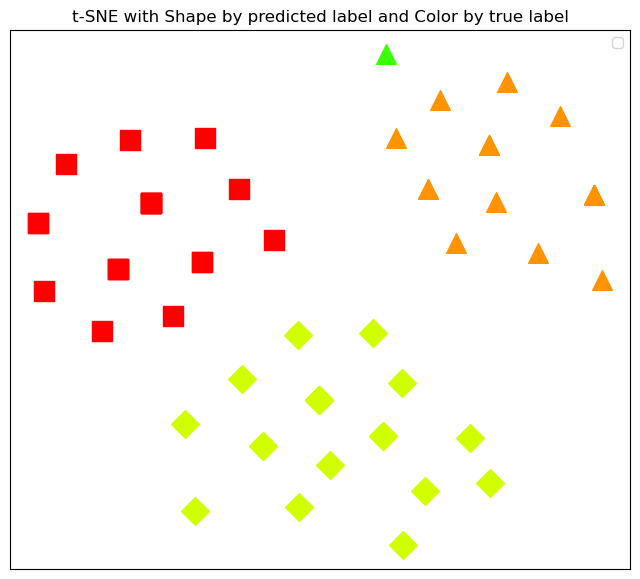

In [211]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap

predicted_np = predicted.cpu().numpy()
y_encoded = label_encoder.fit_transform(y)

markers = ['o', 's', '^', 'P', 'D', 'v', 'h', 'X']
unique_labels = np.unique(y)

colors = plt.cm.get_cmap('viridis', len(np.unique(y_pred)))

fig, ax = plt.subplots(figsize=(8,7))

hsv_modified = cm.get_cmap('hsv', 500)
newcmp = ListedColormap(hsv_modified(np.linspace(0.0, 0.3, 500)))

for xi,yi,mi,ci in zip(X_tsne[:, 0], X_tsne[:, 1] , predicted_np, y_encoded):
    ax.scatter(xi,yi,c=ci, marker=markers[mi], s=200, cmap=newcmp, vmin=min(y_encoded), vmax=max(y_encoded))

ax.set_xticks([])
ax.set_yticks([])

plt.title('t-SNE with Shape by predicted label and Color by true label')
plt.legend()
plt.savefig('Figure4a.png', format='png', dpi=300)
plt.show()

In [149]:
X_tsne[:,0]

array([ -23.053167,  282.9892  ,  203.46754 ,   69.10038 ,   25.505396,
         69.10038 ,  -29.780272,   34.033886,  134.79666 ,  184.8223  ,
        164.704   ,   69.10038 ,  125.05413 ,  111.91496 ,  216.7599  ,
         69.10038 ,  184.8223  ,   69.10038 ,  184.8223  ,   91.52832 ,
        294.015   ,  251.31458 ,   84.74739 ,   73.317215,  133.90031 ,
         73.317215,  208.11429 ,   73.317215,  208.11429 ,   73.317215,
        133.90031 ,  300.9069  ,  215.23996 ,   73.317215,  208.11429 ,
         73.317215,   25.374662,  -31.894033,  164.16348 ,   73.317215,
       -118.01449 , -338.6583  , -129.489   , -385.80237 , -176.61035 ,
       -221.23737 , -215.90645 , -211.43434 , -298.46198 , -420.63742 ,
       -272.5924  , -259.4672  , -176.61035 ,  -69.32715 , -300.43472 ,
       -215.90645 , -272.5924  , -215.90645 , -215.90645 , -120.288025],
      dtype=float32)

In [214]:
X_tsne.shape

(61, 2)

In [217]:
predicted_np.shape

(61,)

In [218]:
y_encoded.shape

(61,)

In [239]:
combined = np.column_stack((X_tsne, label_encoder.inverse_transform(predicted.cpu().numpy()), y))

In [240]:
df = pd.DataFrame(combined, columns=['t-SNE 1', 't-SNE 2', 'Pred', 'True'])

In [241]:
df

,t-SNE 1,t-SNE 2,Pred,True
0,-240.770416,216.930008,Aspergillus flavus,Aspergillus flavus
1,-148.630661,219.965225,Aspergillus flavus,Aspergillus flavus
2,-355.465637,83.611336,Aspergillus flavus,Aspergillus flavus
3,-151.195602,20.783461,Aspergillus flavus,Aspergillus flavus
4,-215.806702,114.923683,Aspergillus flavus,Aspergillus flavus
...,...,...,...,...
56,-75.957947,-274.271881,Aspergillus nomiae,Aspergillus nomiae
57,-6.471653,-200.363113,Aspergillus nomiae,Aspergillus nomiae
58,-6.471653,-200.363113,Aspergillus nomiae,Aspergillus nomiae
59,7.215556,-304.199432,Aspergillus nomiae,Aspergillus nomiae


In [242]:
df.to_csv('fig4a_out.csv', index=False)

In [232]:
preds = label_encoder.inverse_transform(predicted.cpu().numpy())

In [237]:
y.shape

(61,)